In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [23]:
df = pd.read_csv('images_analyzed_productivity1.csv')
df.head(2)

,User,Time,Coffee,Age,Images_Analyzed,Productivity
0,1,8,0,23,20,Good
1,1,13,0,23,14,Bad


In [24]:
df.User.unique()   

array([1, 2, 3, 4, 5], dtype=int64)

In [25]:
df.Productivity.value_counts(sort=0)# sort = 1 for descending order

Productivity
Good    38
Bad     42
Name: count, dtype: int64

In [26]:
df.Coffee.unique() 

array([0, 2, 4, 6], dtype=int64)

In [27]:
df.Images_Analyzed.unique() 

array([20, 14, 18, 15, 22, 17, 23, 16, 21, 13, 19, 12, 24, 25, 11, 26,  9,
       10], dtype=int64)

In [28]:
df.drop(['Images_Analyzed'], axis=1)
print(df)
print(f'Dropping User')
df.drop(['User'], axis=1, inplace=True)
print(df)

    User  Time  Coffee  Age  Images_Analyzed Productivity
0      1     8       0   23               20         Good
1      1    13       0   23               14          Bad
2      1    17       0   23               18         Good
3      1    22       0   23               15          Bad
4      1     8       2   23               22         Good
..   ...   ...     ...  ...              ...          ...
75     5    23       4   52               14          Bad
76     5     9       6   52               17         Good
77     5    14       6   52                9          Bad
78     5    17       6   52               15          Bad
79     5    23       6   52               10          Bad

[80 rows x 6 columns]
Dropping User
    Time  Coffee  Age  Images_Analyzed Productivity
0      8       0   23               20         Good
1     13       0   23               14          Bad
2     17       0   23               18         Good
3     22       0   23               15          Bad
4      

In [32]:
df.drop(['Images_Analyzed'], axis=1, inplace=True)
df

,Time,Coffee,Age,Productivity
0,8,0,23,Good
1,13,0,23,Bad
2,17,0,23,Good
3,22,0,23,Bad
4,8,2,23,Good
...,...,...,...,...
75,23,4,52,Bad
76,9,6,52,Good
77,14,6,52,Bad
78,17,6,52,Bad


In [33]:
# convert non-numeric data to numeric data
df.Productivity[df.Productivity == 'Good'] = 1
df.Productivity[df.Productivity == 'Bad'] = 0
df.head(2)


C:\Users\OMEN\AppData\Local\Temp\ipykernel_13940\2195666837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Productivity[df.Productivity == 'Good'] = 1
C:\Users\OMEN\AppData\Local\Temp\ipykernel_13940\2195666837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Productivity[df.Productivity == 'Bad'] = 0


,Time,Coffee,Age,Productivity
0,8,0,23,1
1,13,0,23,0


### Defining dependent and independent variables

In [45]:
# dependent
y = df['Productivity'].values.astype(np.int32)

# independent variables 
cols = ['Time', 'Coffee', 'Age']

# dropping the Productivity 
# X = df.drop(labels=['Productivity'], axis=1)

X = df[['Time',  'Coffee', 'Age']]
X.head(2)

,Time,Coffee,Age
0,8,0,23
1,13,0,23


In [46]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=28)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 3), (20, 3), (60,), (20,))

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier(n_estimators=10, random_state=28)
model 

RandomForestClassifier(n_estimators=10, random_state=28)

In [51]:
model.fit(X_train, y_train)

c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(n_estimators=10, random_state=28)

In [54]:
prediction_test = model.predict(X_test)
prediction_test, prediction_test.shape, y_test.shape

c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]),
 (20,),
 (20,))

In [55]:
from sklearn import metrics 

In [56]:
metrics.accuracy_score(y_true=y_test, y_pred=prediction_test)

0.85

## Feature Importance

In [58]:
feature_list = X.columns 
feature_imp = pd.Series(model.feature_importances_, index=feature_list )
print(feature_imp.sort_values(ascending=False))

Time      0.691584
Coffee    0.172803
Age       0.135613
dtype: float64


## Inference

In [63]:
type(X_train), X_train.columns 

(pandas.core.frame.DataFrame, Index(['Time', 'Coffee', 'Age'], dtype='object'))

In [69]:
user_data = pd.DataFrame(
    {'Time':[20,1],
    'Coffee':[0,3],
    'Age':[2,12]}
)
user_data.head(), X_train.head()

(   Time  Coffee  Age
 0    20       0    2
 1     1       3   12,
     Time  Coffee  Age
 78    17       6   52
 67    23       0   52
 63    22       6   45
 38    18       2   31
 30    16       6   65)

Hence, it is the same format as X_train and can be passed to model for inference.

In [71]:
model.predict(user_data)

c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 1])

# Visualizing the trees of RF

In [73]:
indv_tree = model.estimators_[0]
indv_tree 

DecisionTreeClassifier(max_features='sqrt', random_state=983606529)

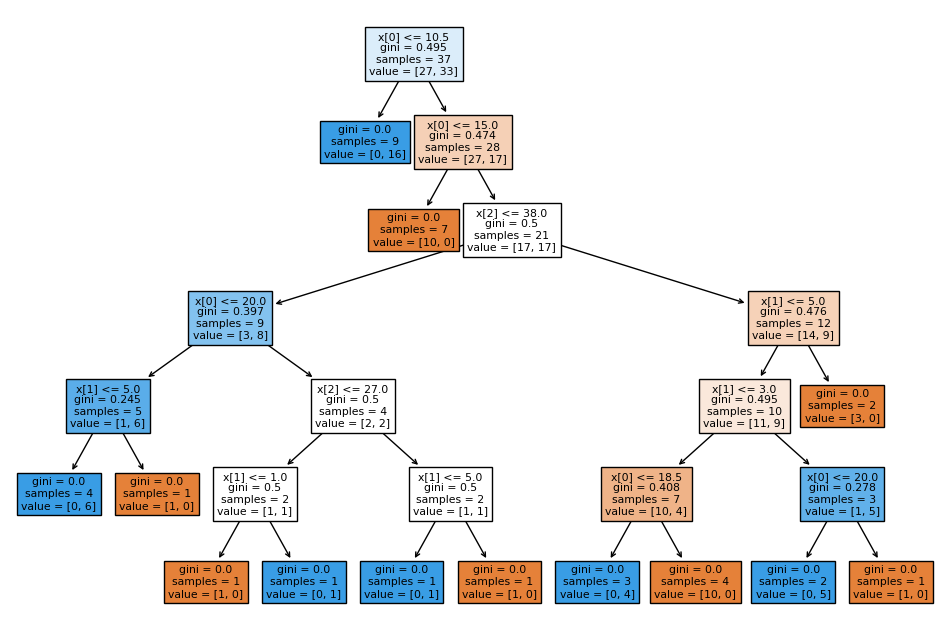

In [74]:
import sklearn 

plt.figure(figsize=(12,8))
sklearn.tree.plot_tree(indv_tree,  filled=True)
plt.show()